# Tutorial Morgane Kappeler


In [25]:
#imports

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Fuzzy variables
# working with fantasy books, using ratings, violence_level and tone as input variables
rating = ctrl.Antecedent(np.arange(0,5.1,0.1), 'rating')
violence_level = ctrl.Antecedent(np.arange(0,10.1,0.1), 'violence_level')
tone = ctrl.Antecedent(np.arange(0,10.1,0.1), 'tone')
# output variable
suggestion = ctrl.Consequent(np.arange(0,101,1), 'suggestion')

# define membership functions
rating['low'] = fuzz.trimf(rating.universe,[0,0,2.5])
rating['medium'] = fuzz.trimf(rating.universe,[1.5,3,4.5])
rating['high'] = fuzz.trimf(rating.universe,[3.5,5,5])

violence_level['mild'] = fuzz.trimf(violence_level.universe,[0,0,4])
violence_level['moderate'] = fuzz.trimf(violence_level.universe,[2,5,8])
violence_level['strong'] = fuzz.trimf(violence_level.universe,[6,10,10])

tone['dark'] = fuzz.trimf(tone.universe,[0,0,4])
tone['sad'] = fuzz.trimf(tone.universe,[3,5,7])
tone['hopeful'] = fuzz.trimf(tone.universe,[6,10,10])

suggestion['low'] = fuzz.trimf(suggestion.universe,[0,0,40])
suggestion['medium'] = fuzz.trimf(suggestion.universe, [30,50,70])
suggestion['high'] = fuzz.trimf(suggestion.universe, [60,100,100])



/home/mow/miniconda3/envs/fuzzy/lib/python3.11/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


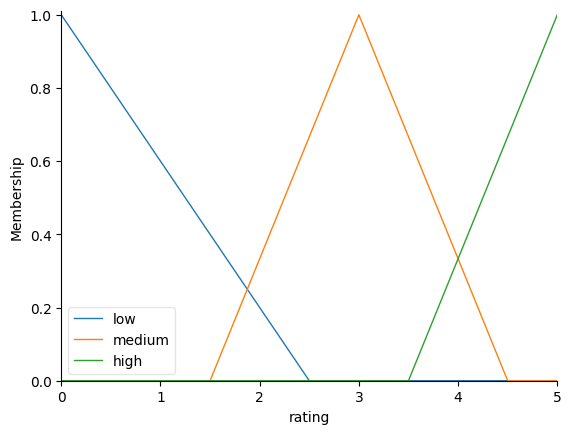

In [4]:
rating.view()

/home/mow/miniconda3/envs/fuzzy/lib/python3.11/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


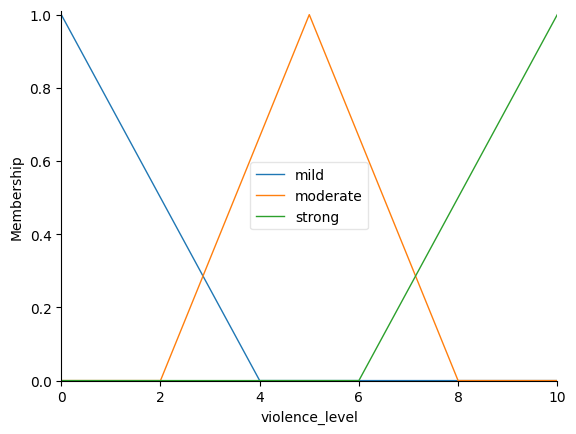

In [5]:
violence_level.view()

/home/mow/miniconda3/envs/fuzzy/lib/python3.11/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


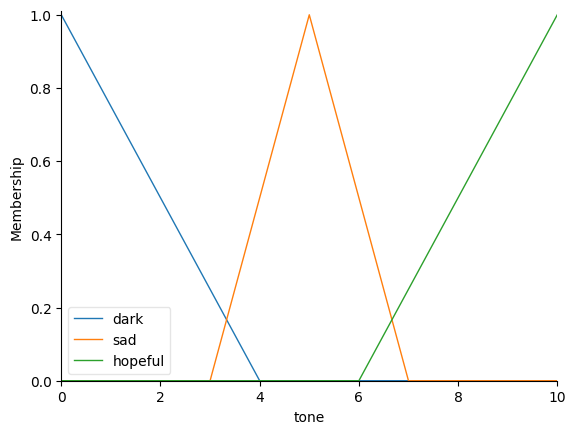

In [6]:
tone.view()

/home/mow/miniconda3/envs/fuzzy/lib/python3.11/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


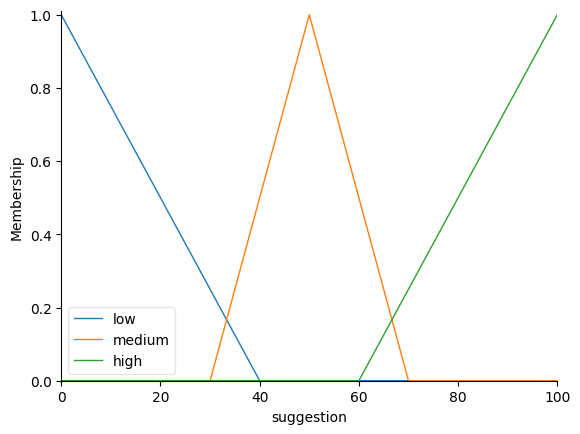

In [7]:
suggestion.view()

In [9]:
# fuzzy rules
rule1 = ctrl.Rule(rating['high'] & tone['hopeful'], suggestion['high'])
rule2 = ctrl.Rule(rating['medium'] & violence_level['moderate'], suggestion['medium'])
rule3 = ctrl.Rule(rating['low'] | tone['dark'], suggestion['low'])
rule4 = ctrl.Rule(violence_level['strong'] & rating['medium'], suggestion['low'])
rule5 = ctrl.Rule(violence_level['mild'] & rating['high'], suggestion['high'])
rule6 = ctrl.Rule(tone['sad'] & rating['medium'], suggestion['medium'])

(<Figure size 640x480 with 1 Axes>, <Axes: >)

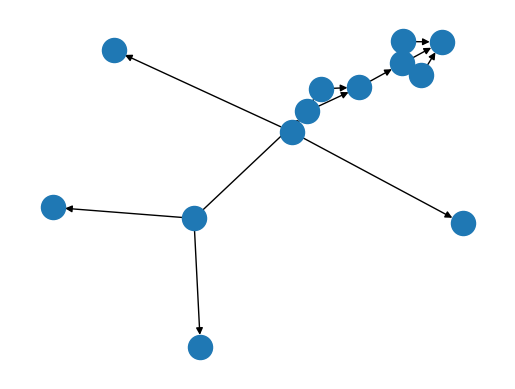

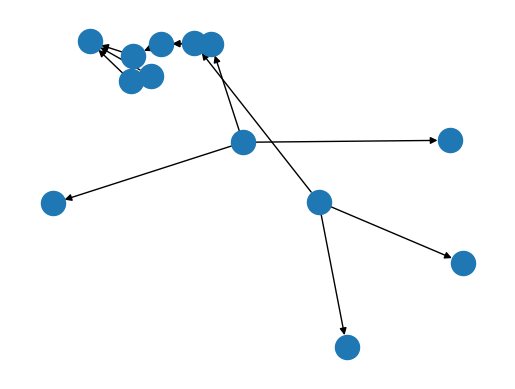

In [11]:
rule1.view()
rule2.view()

In [22]:
suggestion_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6])
suggestion_sim = ctrl.ControlSystemSimulation(suggestion_ctrl)

In [21]:
# create book database
books = pd.DataFrame([
    {"title": "The Hobbit", "rating":5, "violence": 6, "tone": 9},
    {"title": "Babel", "rating": 4.7, "violence_level": 3, "tone": 1},
    {"title": "Uprooted", "rating": 3.5, "violence_level": 4, "tone": 4},
    {"title": "The Starless Sea", "rating": 5, "violence_level": 1, "tone": 8},
    {"title": "The Spirit Bares", "rating": 2, "violence_level": 9, "tone": 2},
    {"title": "The Atlas Six", "rating": 3, "violence_level": 5, "tone": 5},
    {"title": "Circé", "rating": 2, "violence_level": 1, "tone": 5},
])

In [23]:
# compute the suggestions
recs = []
for _, row in books.iterrows():
    suggestion_sim.input['rating'] = row['rating']
    suggestion_sim.input['violence_level'] = row['violence_level']
    suggestion_sim.input['tone'] = row['tone']
    suggestion_sim.compute()
    output = suggestion_sim.output['suggestion']
    recs.append(output)

books['suggestions_strengh'] = recs

In [24]:
print(books)

              title  rating  violence  tone  violence_level  \
0        The Hobbit     5.0       6.0     9             NaN   
1             Babel     4.7       NaN     1             3.0   
2          Uprooted     3.5       NaN     4             4.0   
3  The Starless Sea     5.0       NaN     8             1.0   
4  The Spirit Bares     2.0       NaN     2             9.0   
5     The Atlas Six     3.0       NaN     5             5.0   
6             Circé     2.0       NaN     5             1.0   

   suggestions_strengh  
0            86.666667  
1            35.757576  
2            50.000000  
3            86.000000  
4            15.555556  
5            50.000000  
6            37.587768  


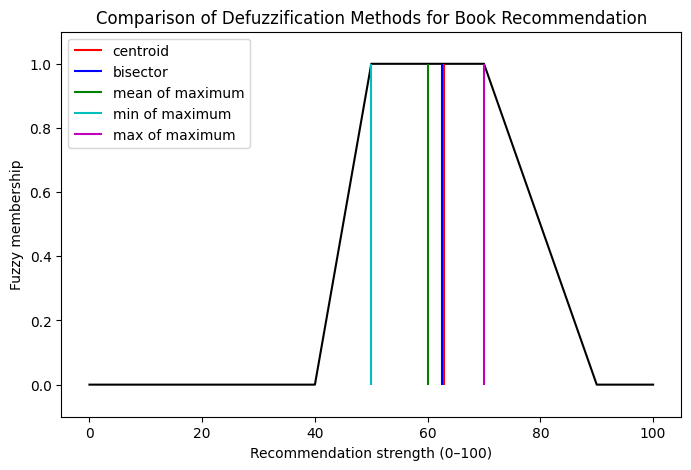

In [29]:
x = np.arange(0, 100.5, 0.5)
mfx = fuzz.trapmf(x, [40, 50, 70, 90])

# Defuzzify this membership function five ways
defuzz_centroid = fuzz.defuzz(x, mfx, 'centroid')  # Same as skfuzzy.centroid
defuzz_bisector = fuzz.defuzz(x, mfx, 'bisector')
defuzz_mom = fuzz.defuzz(x, mfx, 'mom')
defuzz_som = fuzz.defuzz(x, mfx, 'som')
defuzz_lom = fuzz.defuzz(x, mfx, 'lom')

# Collect info for vertical lines
labels = ['centroid', 'bisector', 'mean of maximum', 'min of maximum', 'max of maximum']
xvals = [defuzz_centroid, defuzz_bisector, defuzz_mom, defuzz_som, defuzz_lom]
colors = ['r', 'b', 'g', 'c', 'm']
ymax = [fuzz.interp_membership(x, mfx, i) for i in xvals]

# Display and compare defuzzification results against membership function
plt.figure(figsize=(8, 5))
plt.plot(x, mfx, 'k')
for xv, y, label, color in zip(xvals, ymax, labels, colors):
    plt.vlines(xv, 0, y, label=label, color=color)
plt.ylabel('Fuzzy membership')
plt.xlabel('Recommendation strength (0–100)')
plt.ylim(-0.1, 1.1)
plt.legend(loc=2)
plt.title("Comparison of Defuzzification Methods for Book Recommendation")
plt.show()
